Moyennes arrondies : 

CLUSTER 0
Taux de suicide moyen pour cluster 0 : 14
Moyenne IC = 19, Moyenne Esperance de vie : 73, Moyenne PIB : 23740

CLUSTER 1
Taux de suicide moyen pour cluster 1 : 7
Moyenne IC = 10, Moyenne Esperance de vie : 72, Moyenne PIB : 12287

CLUSTER 2
Taux de suicide moyen pour cluster 2 : 6
Moyenne IC = 8, Moyenne Esperance de vie : 73, Moyenne PIB : 13422



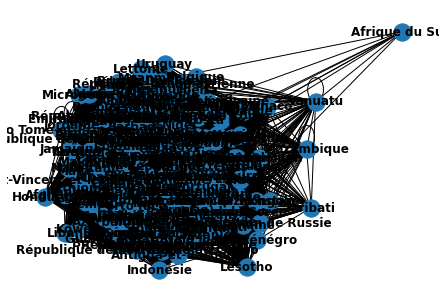

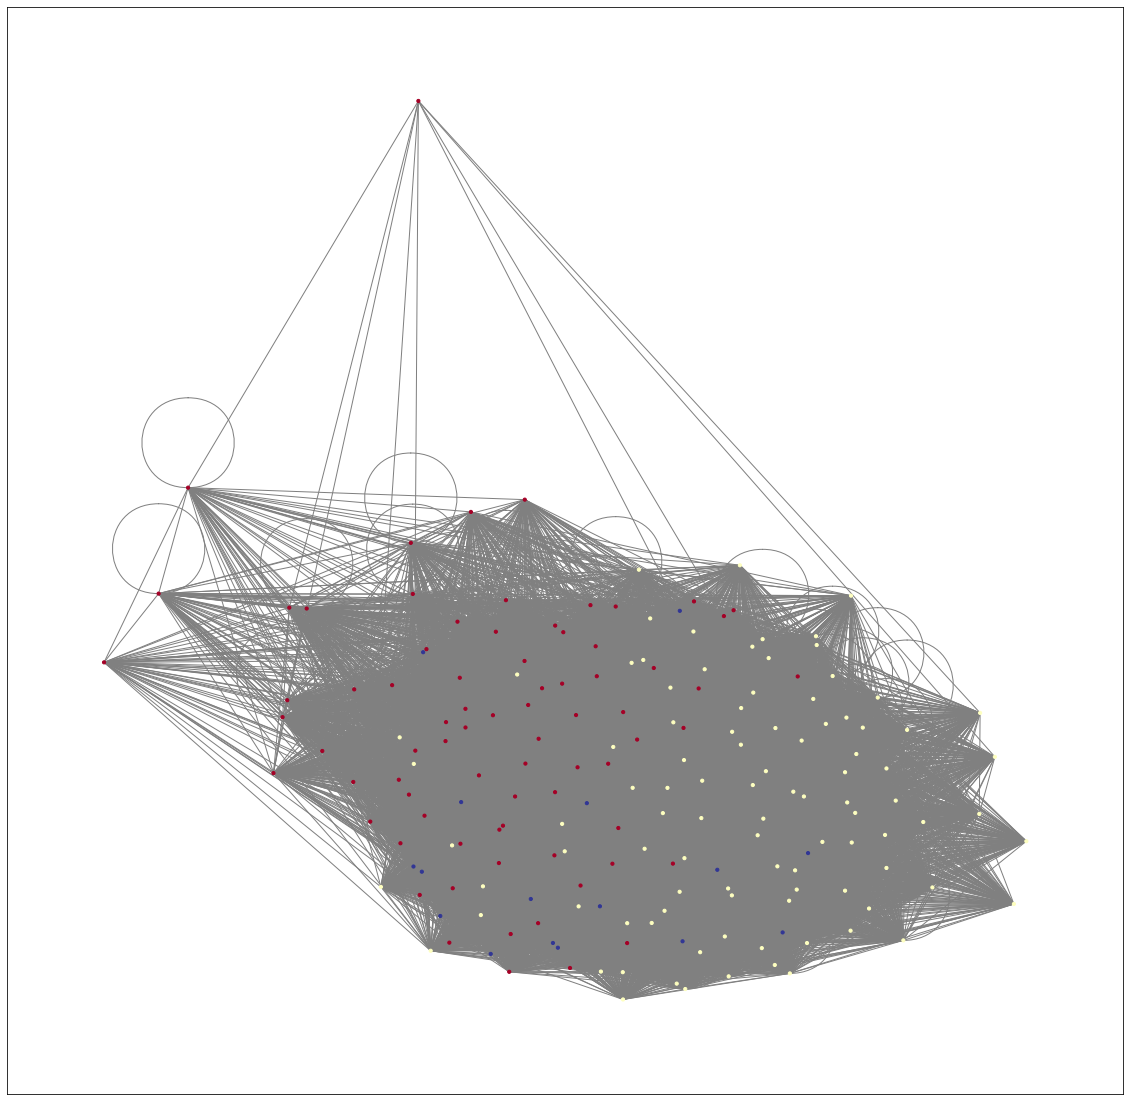

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
from operator import itemgetter
from pandas import *
import networkx
from sklearn import preprocessing
from community import community_louvain
 
 
G = nx.Graph()
data=read_csv('total.csv')
 
liste_pays=data['countryName'].tolist()
indice=data['edges'].tolist()
esperanceVie=data['Espérance de vie à la naissance total (années)'].tolist()
pib=data['PIB par habitant ($ US courants)'].tolist()

 
 
G.add_nodes_from(liste_pays)
 
pays_a=-1
pays_b=-1
compteur=0
 
for pays in indice:
   pays_a+=1
   pays_b=1
   if compteur==190:
       break
   if pays_a==190:
       break
   for pays_de_comparaison in indice:
       pays_b+=1
       if pays_b==190:
           compteur+=1
           break
       if abs(pays-pays_de_comparaison) < 10:
           G.add_edge(liste_pays[pays_a],liste_pays[pays_b])
 
nx.draw(G, with_labels=True, font_weight='bold')

cluster_0=[]
cluster_1=[]
cluster_2=[]
moyenne_ic0=0
moyenne_ic1=0
moyenne_ic2=0
moyenne_pib0=0
moyenne_pib1=0
moyenne_pib2=0
moyenne_ev0=0
moyenne_ev1=0
moyenne_ev2=0

partition = community_louvain.best_partition(G)

for key,value in partition.items():
  if value==0:
    cluster_0.append(key)
  elif value==1:
    cluster_1.append(key)
  else:
    cluster_2.append(key)

#calcul de la moyenne de l'IC par cluster
for pays in cluster_0:
  j=-1
  for p in liste_pays:
    j=j+1
    if pays==p:
      moyenne_ic0+=indice[j]
moyenne_ic0/=len(cluster_0)

for pays in cluster_1:
  j=-1
  for p in liste_pays:
    j+=1
    if pays==p:
      moyenne_ic1+=indice[j]
moyenne_ic1/=len(cluster_1)


for pays in cluster_2:
  j=-1
  for p in liste_pays:
    j+=1
    if pays==p:
      moyenne_ic2+=indice[j]
moyenne_ic2/=len(cluster_2)

#calcul de la moyenne du pib par cluster
for pays in cluster_0:
  j=-1
  for p in liste_pays:
    j=j+1
    if pays==p:
      moyenne_pib0+=pib[j]
moyenne_pib0/=len(cluster_0)

for pays in cluster_1:
  j=-1
  for p in liste_pays:
    j+=1
    if pays==p:
      moyenne_pib1+=pib[j]
moyenne_pib1/=len(cluster_1)


for pays in cluster_2:
  j=-1
  for p in liste_pays:
    j+=1
    if pays==p:
      moyenne_pib2+=pib[j]
moyenne_pib2/=len(cluster_2)

#calcul de l'esperance de vie par cluster
for pays in cluster_0:
  j=-1
  for p in liste_pays:
    j=j+1
    if pays==p:
      moyenne_ev0+=esperanceVie[j]
moyenne_ev0/=len(cluster_0)

for pays in cluster_1:
  j=-1
  for p in liste_pays:
    j+=1
    if pays==p:
      moyenne_ev1+=esperanceVie[j]
moyenne_ev1/=len(cluster_1)


for pays in cluster_2:
  j=-1
  for p in liste_pays:
    j+=1
    if pays==p:
      moyenne_ev2+=esperanceVie[j]
moyenne_ev2/=len(cluster_2)


print("Moyennes arrondies : \n")
print("CLUSTER 0")
print("Taux de suicide moyen pour cluster 0 : 14")
print(f"Moyenne IC = {round(moyenne_ic0)}, Moyenne Esperance de vie : {round(moyenne_ev0)}, Moyenne PIB : {round(moyenne_pib0)}\n")

print("CLUSTER 1")
print("Taux de suicide moyen pour cluster 1 : 7")
print(f"Moyenne IC = {round(moyenne_ic1)}, Moyenne Esperance de vie : {round(moyenne_ev1)}, Moyenne PIB : {round(moyenne_pib1)}\n")

print("CLUSTER 2")
print("Taux de suicide moyen pour cluster 2 : 6")
print(f"Moyenne IC = {round(moyenne_ic2)}, Moyenne Esperance de vie : {round(moyenne_ev2)}, Moyenne PIB : {round(moyenne_pib2)}\n")


position = networkx.spring_layout(G,k=0.1)
plt.figure(figsize=(20,20))
networkx.draw_networkx_nodes(G, position,         
         cmap=plt.cm.RdYlBu,node_size = 10,
         node_color=list(partition.values()))
# Les traits
networkx.draw_networkx_edges(G, position, edge_color="gray")
plt.show(G)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')